In [1]:
import pickle
from gensim.models import word2vec, Word2Vec
import multiprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import pickle
import requests
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random
from scipy.spatial.distance import cosine
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from chembl_webresource_client.new_client import new_client
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Reshape, GRU, SpatialDropout1D, LSTM, Dropout, RepeatVector
from keras.layers import BatchNormalization, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KDTree
from sklearn.svm import SVC

from nltk.tokenize import sent_tokenize, word_tokenize
from keras.preprocessing.text import Tokenizer,text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import adam
from keras import backend as K
from keras.models import Model
from keras import initializers
from keras.engine.topology import Layer
from keras.layers import Dense, Input
from keras.layers import Embedding, GRU, Bidirectional, TimeDistributed
from tensorflow.python.ops.rnn import bidirectional_dynamic_rnn
import nltk
nltk.download('punkt')

%matplotlib inline

/Users/dweepa/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
[nltk_data] Downloading package punkt to /Users/dweepa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
dimensions = 100

In [3]:
from keras.preprocessing.sequence import skipgrams
from keras.preprocessing import text

In [4]:
with open("./data/mol_sentences.pkl", "rb") as file:
    sentences = pickle.load(file)
    
atc = [sentence[1][0] for sentence in sentences]
sentences = [sentence[3] for sentence in sentences]

In [5]:
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(sentences)
print("Word Index: ",tokenizer.word_index)

Word Index:  {'3218693969': 1, '3217380708': 2, '951226070': 3, '2245384272': 4, '2968968094': 5, '2246728737': 6, '864942730': 7, '2976033787': 8, '98513984': 9, '864662311': 10, '2246699815': 11, '1510328189': 12, '864674487': 13, '2092489639': 14, '2245273601': 15, '994485099': 16, '10565946': 17, '2041434490': 18, '2117068077': 19, '2803848648': 20, '847961216': 21, '2976816164': 22, '1510461303': 23, '3542456614': 24, '3189457552': 25, '3537119515': 26, '847957139': 27, '1533864325': 28, '2142032900': 29, '1861965050': 30, '266675433': 31, '882399112': 32, '2132511834': 33, '1016841875': 34, '3975275337': 35, '26234434': 36, '2119439498': 37, '2228063684': 38, '848128881': 39, '2246703798': 40, '3452535345': 41, '3818546315': 42, '422715066': 43, '1276993226': 44, '1542633699': 45, '517457164': 46, '864942795': 47, '3537123720': 48, '4121755354': 49, '1135286194': 50, '2245277810': 51, '1535166686': 52, '2076190208': 53, '4008337421': 54, '1100037548': 55, '3351556771': 56, '11019

In [6]:
word2id = tokenizer.word_index
id2word = {v:k for k, v in word2id.items()}

vocab_size = len(word2id) + 1 
embed_size=100
wids = [[word2id[w] for w in doc] for doc in sentences]
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 2825
Vocabulary Sample: [('3218693969', 1), ('3217380708', 2), ('951226070', 3), ('2245384272', 4), ('2968968094', 5), ('2246728737', 6), ('864942730', 7), ('2976033787', 8), ('98513984', 9), ('864662311', 10)]


In [7]:
skip_grams = [skipgrams(wid, vocabulary_size=vocab_size, window_size=10) for wid in wids]

# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          id2word[pairs[i][0]], pairs[i][0], 
          id2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(135980867 (918), 4222851645 (93)) -> 1
(10565946 (17), 847961216 (21)) -> 1
(3218693969 (1), 2245273601 (15)) -> 1
(2246699815 (11), 216283652 (2137)) -> 0
(951226070 (3), 4222851645 (93)) -> 1
(3218693969 (1), 2245273601 (15)) -> 1
(3234104871 (290), 864942730 (7)) -> 1
(4222851645 (93), 2214358924 (1523)) -> 0
(2246728737 (6), 3537123720 (48)) -> 1
(1582607016 (335), 2245273601 (15)) -> 1


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 100)       282500      input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 100, 1)       0           embedding[0][0]                  
__________

/Users/dweepa/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`


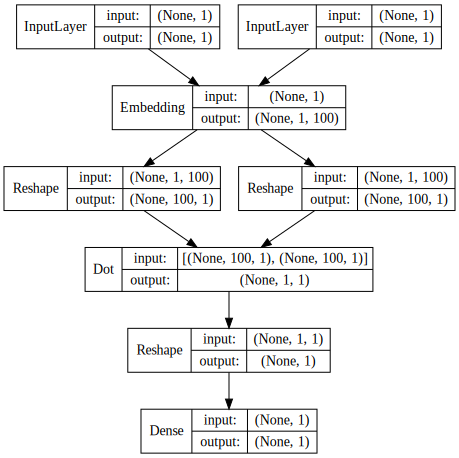

In [8]:
from keras.layers.core import Dense, Reshape
from keras.layers.merge import dot
from keras.layers.embeddings import Embedding
from keras.models import Sequential

input_target = Input((1,))
input_context = Input((1,))

embedding = Embedding(vocab_size, embed_size, input_length=1, name='embedding')
word_embedding = embedding(input_target)
word_embedding = Reshape((embed_size, 1))(word_embedding)

context_embedding = embedding(input_context)
context_embedding = Reshape((embed_size, 1))(context_embedding)

# now perform the dot product operation  
dot_product = dot([word_embedding, context_embedding], axes=1)
dot_product = Reshape((1,))(dot_product)

# add the sigmoid output layer
output = Dense(1, activation='sigmoid')(dot_product)

model = Model(input=[input_target, input_context], output=output)
model.compile(loss='mean_squared_error', optimizer='rmsprop')

# view model summary
print(model.summary())

# visualize model structure
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

In [9]:
for epoch in range(1, 6):
    loss = 0
    for i, elem in enumerate(skip_grams):
        try:
            pair_first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
            pair_second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
            labels = np.array(elem[1], dtype='int32')
            X = [pair_first_elem, pair_second_elem]
            Y = labels
            if i % 100 == 0:
                print('Processed {} (skip_first, skip_second, relevance) pairs'.format(i))
            loss += model.train_on_batch(X,Y)  
        except:
            break
    print('Epoch:', epoch, 'Loss:', loss)

Processed 0 (skip_first, skip_second, relevance) pairs
Processed 100 (skip_first, skip_second, relevance) pairs
Processed 200 (skip_first, skip_second, relevance) pairs
Processed 300 (skip_first, skip_second, relevance) pairs
Processed 400 (skip_first, skip_second, relevance) pairs
Processed 500 (skip_first, skip_second, relevance) pairs
Processed 600 (skip_first, skip_second, relevance) pairs
Processed 700 (skip_first, skip_second, relevance) pairs
Processed 800 (skip_first, skip_second, relevance) pairs
Processed 900 (skip_first, skip_second, relevance) pairs
Processed 1000 (skip_first, skip_second, relevance) pairs
Epoch: 1 Loss: 188.8116211257875
Processed 0 (skip_first, skip_second, relevance) pairs
Processed 100 (skip_first, skip_second, relevance) pairs
Processed 200 (skip_first, skip_second, relevance) pairs
Processed 300 (skip_first, skip_second, relevance) pairs
Processed 400 (skip_first, skip_second, relevance) pairs
Processed 500 (skip_first, skip_second, relevance) pairs
P

In [10]:
word_embed_layer = model.layers[2]
weights = word_embed_layer.get_weights()[0][1:]

print(weights.shape)
pd.DataFrame(weights, index=id2word.values()).head()

(2824, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
3218693969,0.069462,0.186820,-0.022323,-0.047635,0.075033,-0.047192,-0.001440,-0.060118,-0.121985,0.113716,...,-0.369142,0.022860,0.160180,0.362217,-0.088404,0.005330,-0.053094,0.112837,-0.037296,0.109989
3217380708,-0.216315,0.190149,-0.135364,0.026692,-0.040002,0.261581,0.034873,-0.130540,0.032671,0.122567,...,-0.205237,-0.116790,0.120807,0.133801,0.008663,0.172686,0.054775,0.071016,-0.024153,-0.165230
951226070,0.102585,0.137693,0.082388,-0.054008,0.068087,-0.100241,-0.071135,-0.074063,-0.196392,0.071455,...,-0.606018,0.136429,0.277068,0.470230,-0.090927,-0.024629,-0.090829,0.105416,-0.216107,0.095680
2245384272,-0.064282,0.434891,-0.187409,-0.044029,0.018962,-0.047014,-0.125167,-0.034808,-0.318876,-0.013965,...,0.798738,0.079490,0.191589,-0.073061,0.268433,0.042080,-0.247436,-0.342135,0.058659,-0.049527
2968968094,0.209103,0.435719,0.171114,0.003200,0.035792,0.020810,0.097208,0.155902,-0.077888,0.005036,...,0.769809,0.097702,-0.286613,0.354436,-0.371654,-0.030291,-0.040969,0.204164,-0.050169,-0.025026


In [11]:
from sklearn.metrics.pairwise import euclidean_distances

distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['2246728737','3537119515','2245273601','2423543607']}

similar_words

(2824, 2824)


/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


{'2245273601': ['3537119515',
  '847961216',
  '1542633699',
  '2245384272',
  '1533864325'],
 '2246728737': ['864674487',
  '3542456614',
  '848128881',
  '3818546315',
  '3537119515'],
 '2423543607': ['1674219510',
  '3994088662',
  '592593828',
  '2635303940',
  '984189120'],
 '3537119515': ['2245273601',
  '1542633699',
  '1510461303',
  '848128881',
  '2245277810']}

Total words: 24 	Word Embedding shapes: (24, 100)


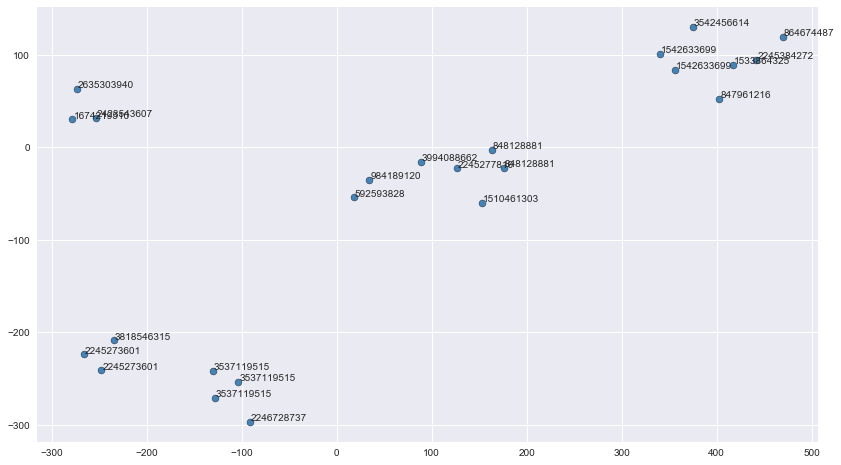

In [12]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
words_ids = [word2id[w] for w in words]
word_vectors = np.array([weights[idx] for idx in words_ids])
print('Total words:', len(words), '\tWord Embedding shapes:', word_vectors.shape)

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_vectors)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [13]:
def getVectors(words, word2id):
    words_ids = [word2id[w]-1 for w in words]
    word_vectors = sum(np.array([weights[idx] for idx in words_ids]))
    return word_vectors

# Vectorization

In [15]:
sum_vectors = []
for sentence in sentences:
    vector = getVectors(sentence, word2id)
    sum_vectors.append(vector)
    
sum_vectors = np.asarray(sum_vectors)

In [16]:
print(sum_vectors.shape)
le = LabelEncoder()
le.fit(atc)
atc = le.transform(atc)

(2731, 100)


## Data Preparation

In [17]:
X = sum_vectors
y = atc

atc_counter = Counter(y)
top_atc = [a for a, _ in atc_counter.most_common(14)]

temp_x = []
temp_y = []

for i in range(y.shape[0]):
    if y[i] in top_atc:
        temp_x.append(X[i])
        temp_y.append(y[i])
        
X = np.asarray(temp_x)
y = np.asarray(temp_y)

atc_labels = le.inverse_transform(np.unique(y))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=int(random.random()*100))

## Helper Functions

In [19]:
def accuracy(y_true, y_pred, atc_labels=atc_labels):
    print("Overall Accuracy:", np.sum(np.equal(y_true, y_pred))/y_true.shape[0])
    matrix = confusion_matrix(y_true, y_pred)
    print(classification_report(y_true, y_pred))
    plt.figure(figsize=(10, 10))
    sns.heatmap(matrix, annot=True,cbar=False, xticklabels=atc_labels, yticklabels=atc_labels)

## KNN

In [20]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Overall Accuracy: 0.39634146341463417
              precision    recall  f1-score   support

           0       0.28      0.51      0.36        85
           1       0.07      0.08      0.07        25
           2       0.36      0.37      0.37       111
           3       0.32      0.21      0.26        70
           4       0.37      0.35      0.36        43
           5       0.50      0.27      0.35        11
           6       0.52      0.63      0.57        87
           7       0.44      0.23      0.30        62
           8       0.38      0.39      0.38        36
           9       0.55      0.63      0.59       141
          10       0.43      0.10      0.16        30
          11       0.47      0.31      0.37        59
          12       0.08      0.04      0.05        25
          13       0.34      0.34      0.34        35

   micro avg       0.40      0.40      0.40       820
   macro avg       0.36      0.32      0.32       820
weighted avg       0.40      0.40      0.3

/Users/dweepa/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
/Users/dweepa/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


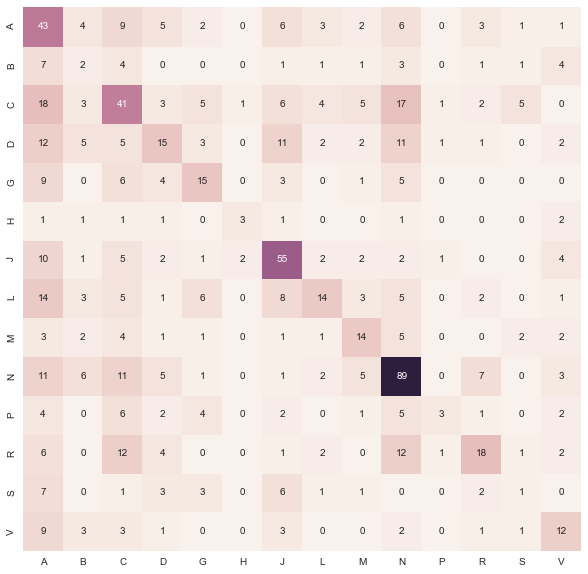

In [21]:
y_pred = neigh.predict(X_test)
accuracy(y_test, y_pred, atc_labels)

## Random Forest

In [22]:
rf_model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt', criterion='entropy')
# Fit on training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Overall Accuracy: 0.4219512195121951
              precision    recall  f1-score   support

           0       0.27      0.35      0.30        85
           1       0.12      0.04      0.06        25
           2       0.37      0.48      0.42       111
           3       0.50      0.26      0.34        70
           4       0.52      0.37      0.43        43
           5       0.67      0.18      0.29        11
           6       0.50      0.68      0.57        87
           7       0.50      0.27      0.35        62
           8       0.32      0.28      0.30        36
           9       0.47      0.72      0.57       141
          10       0.44      0.13      0.21        30
          11       0.49      0.29      0.36        59
          12       0.18      0.08      0.11        25
          13       0.44      0.46      0.45        35

   micro avg       0.42      0.42      0.42       820
   macro avg       0.41      0.33      0.34       820
weighted avg       0.42      0.42      0.40

/Users/dweepa/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
/Users/dweepa/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


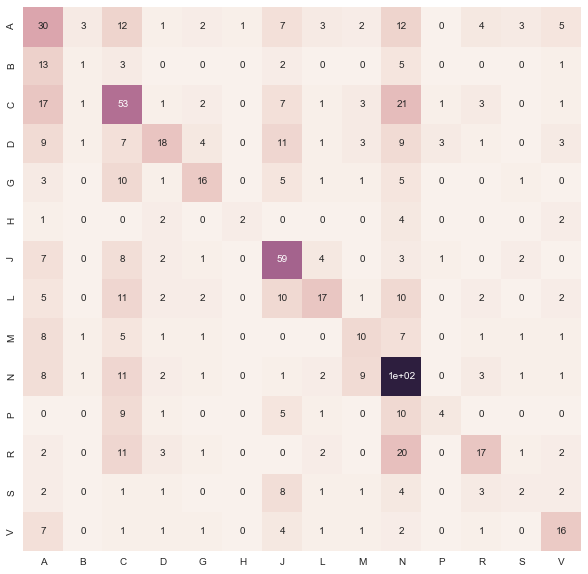

In [23]:
y_pred = rf_model.predict(X_test)
accuracy(y_test, y_pred, atc_labels)

## ANN

In [24]:
oeAtc = OneHotEncoder(sparse=False)
oeAtc.fit(y.reshape(-1, 1))
y_onehot = oeAtc.transform(y.reshape(-1, 1))

X_train, X_test, y_onehot_train, y_onehot_test = train_test_split(X, y_onehot, test_size=0.3, random_state=int(random.random()*100))

/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [25]:
class Network:
    def __init__(self, num_classes):
        self.model = Sequential()
        self.model.add(Dense(50, input_dim=dimensions, activation='relu'))
        self.model.add(Dense(30, activation='relu'))
        self.model.add(Dense(20, activation='relu'))
        self.model.add(Dense(num_classes, activation='softmax'))
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        print(self.model.summary())
        
    def train(self, X, y, X_test, y_test, epochs=20):
        self.model.fit(X, y, epochs=epochs, validation_data=(X_test, y_test))
    
    def test(self, X, y):
        y_pred = self.model.predict(X).argmax(axis=1)
        y_true = y.argmax(axis=1)
        accuracy(y_true, y_pred)
        

In [26]:
network = Network(len(atc_labels))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_5 (Dense)              (None, 14)                294       
Total params: 7,494
Trainable params: 7,494
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
network.train(X_train, y_onehot_train, X_test, y_onehot_test, epochs=10)

Train on 1911 samples, validate on 820 samples
Epoch 1/10
1911/1911 [==============================] - 1s 346us/step - loss: 2.7554 - acc: 0.1460 - val_loss: 2.4600 - val_acc: 0.2134
Epoch 2/10
1911/1911 [==============================] - 0s 159us/step - loss: 2.4060 - acc: 0.2308 - val_loss: 2.3563 - val_acc: 0.2524
Epoch 3/10
1911/1911 [==============================] - 0s 61us/step - loss: 2.3232 - acc: 0.2632 - val_loss: 2.2926 - val_acc: 0.2780
Epoch 4/10
1911/1911 [==============================] - 0s 55us/step - loss: 2.2526 - acc: 0.2894 - val_loss: 2.2725 - val_acc: 0.2939
Epoch 5/10
1911/1911 [==============================] - 0s 145us/step - loss: 2.2079 - acc: 0.3030 - val_loss: 2.2615 - val_acc: 0.3012
Epoch 6/10
1911/1911 [==============================] - 0s 57us/step - loss: 2.1655 - acc: 0.3255 - val_loss: 2.1937 - val_acc: 0.3073
Epoch 7/10
1911/1911 [==============================] - 0s 54us/step - loss: 2.1481 - acc: 0.3260 - val_loss: 2.1977 - val_acc: 0.3280
Epoch

Overall Accuracy: 0.3402439024390244
              precision    recall  f1-score   support

           0       0.25      0.21      0.23       103
           1       0.00      0.00      0.00        24
           2       0.25      0.36      0.30       107
           3       0.30      0.26      0.28        46
           4       0.31      0.23      0.27        43
           5       1.00      0.08      0.14        13
           6       0.45      0.74      0.56        88
           7       0.26      0.19      0.22        69
           8       0.50      0.13      0.20        39
           9       0.40      0.63      0.49       146
          10       0.00      0.00      0.00        25
          11       0.36      0.09      0.15        53
          12       0.00      0.00      0.00        24
          13       0.44      0.38      0.41        40

   micro avg       0.34      0.34      0.34       820
   macro avg       0.32      0.24      0.23       820
weighted avg       0.32      0.34      0.30

/Users/dweepa/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
/Users/dweepa/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


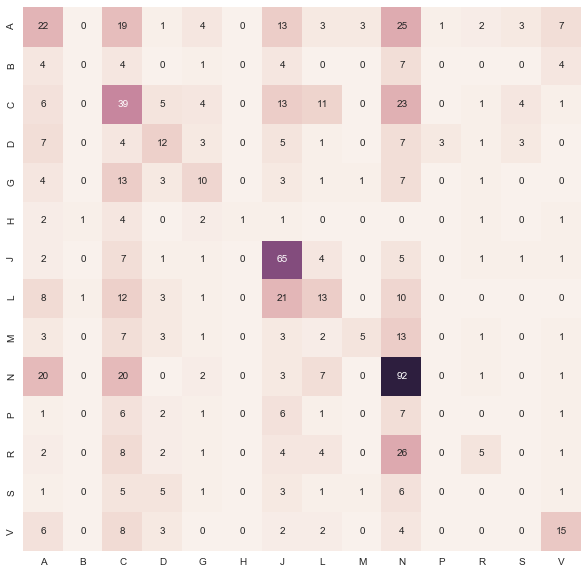

In [28]:
s = network.test(X_test, y_onehot_test)

## SVM

In [29]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Overall Accuracy: 0.15
              precision    recall  f1-score   support

           0       0.10      0.09      0.10        85
           1       0.00      0.00      0.00        25
           2       0.09      0.05      0.07       111
           3       0.50      0.01      0.03        70
           4       0.25      0.02      0.04        43
           5       0.00      0.00      0.00        11
           6       0.08      0.03      0.05        87
           7       0.15      0.03      0.05        62
           8       0.00      0.00      0.00        36
           9       0.17      0.72      0.27       141
          10       0.00      0.00      0.00        30
          11       0.09      0.02      0.03        59
          12       0.00      0.00      0.00        25
          13       0.00      0.00      0.00        35

   micro avg       0.15      0.15      0.15       820
   macro avg       0.10      0.07      0.05       820
weighted avg       0.13      0.15      0.08       820



/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dweepa/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
/Users/dweepa/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


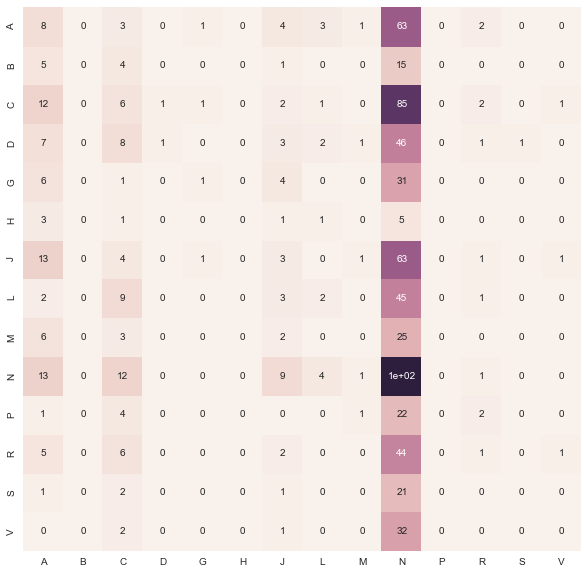

In [30]:
y_pred = clf.predict(X_test)
accuracy(y_test, y_pred, atc_labels)